### Homework 3 - Random matrices ###

1) Choose a given type of ecological structure (e.g. mutualistic, or predator-prey, or etc...). Generate random matrices with for completely random and for the chosen ecological structures. You need to create SxS matrices (S is the number of species) with C non-zero entries and 1-C zeros (C is the connectivity between 0 and 1). The non-zero elements are drawn at random from given distributions. Depending on the network structure some symmetries and constraints may hold. Please follow the detailed step-by-step explanation in the "Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf" (Also uploaded in the Google Drive, note folder). Fix C and variance of the interaction and S=100, and calculate the maximum real eigenvalue of the matrix. Do many realizations and calculate each time such maximum real eigenvalue. Do this for different combinations of C and of the  variance so to have a good range of values of the control parameter  (e.g. for the complete random case is sigma*(S*C)^0.5). Set the self interaction d=-1

Plot the probability for the maximum real eigenvalue of be smaller than 0, against the corresponding control parameter and see when the transition to instability happens. Compare with analytical prediction if avaliable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

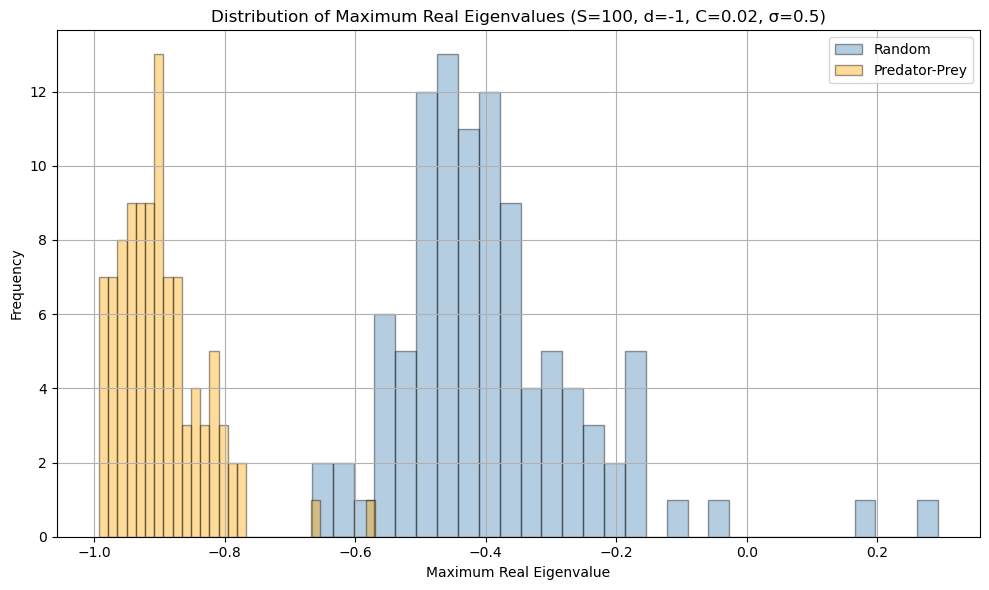

In [9]:
# Let's choose predator-prey dynamics

## PARAMETERS
S = 100 # number of species
C = 0.02 # connectance
d = -1 # self interaction (diagonal terms)
sigma = 0.5 # variance of the Normal distribubtion

## best values C = 0.02, sigma = 0.5

# Set the seed for reproducibility (12345)
#np.random.seed(12345)

# Generate completely random matrices (no ecological structures)
def random_mat(S, C, d, sigma):
    
    mat = np.zeros((S,S)) # create an SxS matrix of zeros
    np.fill_diagonal(mat, d) # set diagonal terms to d
    
    for i in range(S):
        for j in range(S):
            if i != j:                                      # non-diagonal terms
                p = np.random.uniform(0,1)                  # extract a probability p of nodes i,j to be connected
                if p <= C:                                  # compare it with the connectance requirment
                    mat[i,j] = np.random.normal(0,sigma)  # extract the coefficient value                             
                else:
                    continue
    return mat
    
# Predator-prey case
def predator_prey(S, C, d, sigma):
    
    mat = np.zeros((S,S)) # create an SxS matrix of zeros
    np.fill_diagonal(mat, d) # set diagonal terms to d
    
    for i in range(S):
        for j in range(i+1,S):                                                   # non-diagonal terms
            p1 = np.random.uniform(0,1)                             # extract a probability p of nodes i,j to be connected
            if p1 <= C:
                p2 = np.random.uniform(0,1)                         # extract second probability
                #value = np.abs(np.random.normal(0,sigma))                   
                if p2 <= 0.5: 
                    mat[i,j] = np.abs(np.random.normal(0,sigma))                                # extract the coefficient value
                    mat[j,i] = - np.abs(np.random.normal(0,sigma))                              
                else:
                    mat[i,j] = - np.abs(np.random.normal(0,sigma))                              # extract the coefficient value
                    mat[j,i] = np.abs(np.random.normal(0,sigma))
    return mat

## TEST 
'''
np.set_printoptions(precision=2, suppress=True)             # for readability

print('Random matrice: \n', random_mat(50, 0.5, d, sigma))

print('Predator-prey: \n', predator_prey(50,0.5,d,sigma))
'''
## EIGENVALUES
def real_eigval(mat):
    # The matrix must be a square matrix
    eigenvalues = np.linalg.eigvals(mat)                       # compute the eigenvalues
    real_eigenvalues = np.real(eigenvalues)                         # take only the real part of the eigenvalue
    
    return real_eigenvalues

## STATISTICS

it = 100    # number of iterations

r_eigvals = np.empty(it)
pp_eigvals = np.empty(it)

for i in range(it):
    #print(i)
    r_eigvals[i] = np.max(real_eigval(random_mat(S,C,d,sigma)))
    pp_eigvals[i] = np.max(real_eigval(predator_prey(S,C,d,sigma)))

## PLOTS
plt.figure(figsize=(10, 6))
plt.hist(r_eigvals, bins=30, color="steelblue", edgecolor="black", alpha=0.4, label="Random")
plt.hist(pp_eigvals, bins=30, color="orange", edgecolor="black", alpha=0.4, label="Predator-Prey")

# Labels and legend
plt.xlabel("Maximum Real Eigenvalue")
plt.ylabel("Frequency")
plt.title(f"Distribution of Maximum Real Eigenvalues (S={S}, d=-1, C={C}, σ={sigma})")
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

In [10]:
## TEST STABILITY PROBABILITY VS CONTROL PARAMTERS
def scanComplexity(c_vals,s_vals,it=100,S=100,d=-1):
    
    prob_r = np.zeros((s_vals.shape[0],c_vals.shape[0]))
    prob_pp = np.zeros((s_vals.shape[0],c_vals.shape[0]))

    r_eigvals = np.empty(it)
    pp_eigvals = np.empty(it)

    for s_idx, s in enumerate(s_vals):
        for c_idx, c in enumerate(c_vals):
            for i in range(it):
                r_eigvals[i] = np.max(real_eigval(random_mat(S, c, d, s)))
                pp_eigvals[i] = np.max(real_eigval(predator_prey(S, c, d, s)))
                    
            prob_r[s_idx,c_idx] = np.sum(r_eigvals < 0) / r_eigvals.shape[0] 
            prob_pp[s_idx,c_idx] = np.sum(pp_eigvals < 0) / pp_eigvals.shape[0]

    return prob_r, prob_pp
    

## EXECUTION
c_vals = np.linspace(0.1, 1, 10)
s_vals = np.linspace(0.2, 2, 10)

# S=100
# d = -1


prop_r, prop_pp = scanComplexity(c_vals, s_vals)
print('Prop_r:\n',prop_r)
print('Prop_pp:\n',prop_pp)

Prop_r:
 [[1.   0.99 0.24 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
Prop_pp:
 [[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   0.99 0.85 0.54 0.21 0.   0.   0.   0.  ]
 [1.   0.74 0.09 0.   0.   0.   0.   0.   0.   0.  ]
 [0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.45 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  

[[ 0.63  1.  ]
 [ 0.89  0.99]
 [ 1.1   0.24]
 [ 1.26  0.  ]
 [ 1.41  0.  ]
 [ 1.55  0.  ]
 [ 1.67  0.  ]
 [ 1.79  0.  ]
 [ 1.9   0.  ]
 [ 2.    0.  ]
 [ 1.26  0.  ]
 [ 1.79  0.  ]
 [ 2.19  0.  ]
 [ 2.53  0.  ]
 [ 2.83  0.  ]
 [ 3.1   0.  ]
 [ 3.35  0.  ]
 [ 3.58  0.  ]
 [ 3.79  0.  ]
 [ 4.    0.  ]
 [ 1.9   0.  ]
 [ 2.68  0.  ]
 [ 3.29  0.  ]
 [ 3.79  0.  ]
 [ 4.24  0.  ]
 [ 4.65  0.  ]
 [ 5.02  0.  ]
 [ 5.37  0.  ]
 [ 5.69  0.  ]
 [ 6.    0.  ]
 [ 2.53  0.  ]
 [ 3.58  0.  ]
 [ 4.38  0.  ]
 [ 5.06  0.  ]
 [ 5.66  0.  ]
 [ 6.2   0.  ]
 [ 6.69  0.  ]
 [ 7.16  0.  ]
 [ 7.59  0.  ]
 [ 8.    0.  ]
 [ 3.16  0.  ]
 [ 4.47  0.  ]
 [ 5.48  0.  ]
 [ 6.32  0.  ]
 [ 7.07  0.  ]
 [ 7.75  0.  ]
 [ 8.37  0.  ]
 [ 8.94  0.  ]
 [ 9.49  0.  ]
 [10.    0.  ]
 [ 3.79  0.  ]
 [ 5.37  0.  ]
 [ 6.57  0.  ]
 [ 7.59  0.  ]
 [ 8.49  0.  ]
 [ 9.3   0.  ]
 [10.04  0.  ]
 [10.73  0.  ]
 [11.38  0.  ]
 [12.    0.  ]
 [ 4.43  0.  ]
 [ 6.26  0.  ]
 [ 7.67  0.  ]
 [ 8.85  0.  ]
 [ 9.9   0.  ]
 [10.84  0.  ]
 [11.71  0

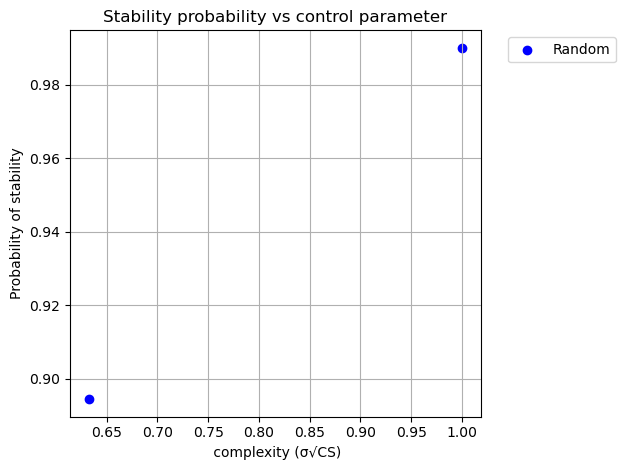

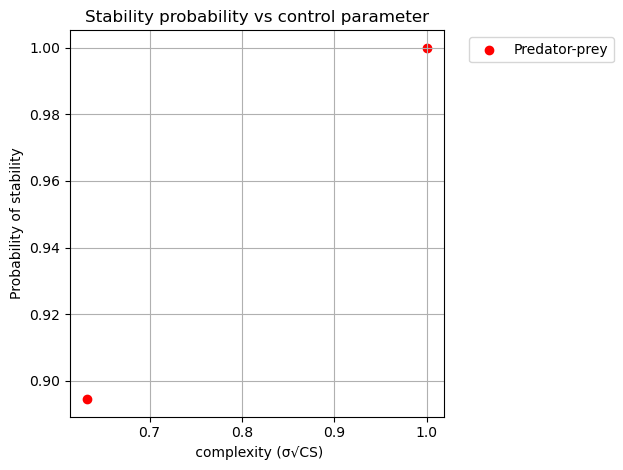

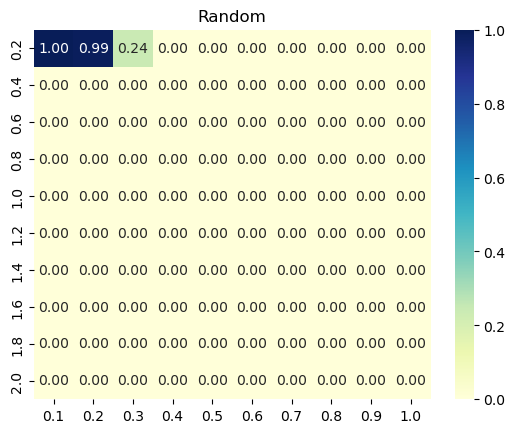

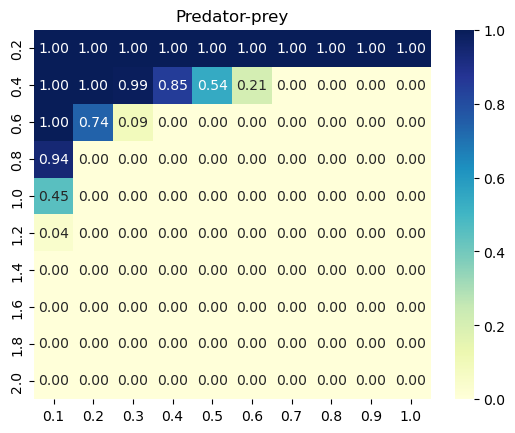

In [11]:
def plotComplexity(prob_r, prob_pp, c_vals, s_vals, S=100, d=-1):
    
    r = np.array([[s_vals[i] * np.sqrt(S * c_vals[j]), prob_r[i,j]] for i in range(s_vals.shape[0]) for j in range(c_vals.shape[0])])
    pp = np.array([[s_vals[i] * np.sqrt(S * c_vals[j]), prob_pp[i,j]] for i in range(s_vals.shape[0]) for j in range(c_vals.shape[0])])
    print(r)
    print('######')
    print(pp)
    
    plt.scatter(r[0], r[1], label='Random', color='b')
    plt.title('Stability probability vs control parameter') 
    plt.xlabel(' complexity (σ√CS)')
    plt.ylabel('Probability of stability')
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    plt.scatter(pp[0], pp[1], label='Predator-prey', color='r')
    plt.title('Stability probability vs control parameter') 
    plt.xlabel(' complexity (σ√CS)')
    plt.ylabel('Probability of stability')
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    sns.heatmap(prob_r, cmap="YlGnBu", annot=True, fmt=".2f", xticklabels=np.round(c_vals, 1), yticklabels=np.round(s_vals, 1))
    plt.title("Random")
    plt.show()
    
    sns.heatmap(prob_pp, cmap="YlGnBu", annot=True, fmt=".2f", xticklabels=np.round(c_vals, 1), yticklabels=np.round(s_vals, 1))
    plt.title("Predator-prey")
    plt.show()
    
## EXECUTION
c_vals = np.linspace(0.1, 1, 10)
s_vals = np.linspace(0.2, 2, 10)
plotComplexity(prop_r, prop_pp, c_vals, s_vals)